<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/4week_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 간단실습

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


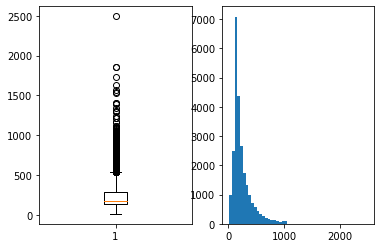

In [3]:
reviews_length = [len(review) for review in X_train]

plt.subplot(1, 2, 1)
plt.boxplot(reviews_length)
plt.subplot(1, 2, 2)
plt.hist(reviews_length, bins = 50)
plt.show()

In [4]:
# 각 레이블 분포 확인
unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print('각 레이블에 대한 빈도수 : ')
print(np.asarray((unique_elements, counts_elements))) # 부정 50% 긍정 50% 확인

각 레이블에 대한 빈도수 : 
[[    0     1]
 [12500 12500]]


In [5]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for k, v in word_to_index.items():
    index_to_word[v+3] = k

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
# 단어 확인
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 1등 단어 : the
빈도수 상위 3938등 단어 : suited


In [7]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [8]:
# 모델 구축
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

In [9]:
max_len = 500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

print(X_train.shape, X_test.shape)

(25000, 500) (25000, 500)


In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length = max_len))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,428,225
Trainable params: 1,428,225
Non-

In [11]:
# 모델 검증
es = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 4)
mc = ModelCheckpoint('LSTM_model.h5', monitor = 'val_loss', verbose = 1, save_est_only = True)

In [12]:
# 모델 훈련
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, callbacks = [es, mc], batch_size = 60, validation_split = 0.2)

Epoch 1/10
334/334 [==============================] - ETA: 0s - loss: 0.4200 - accuracy: 0.8007
Epoch 1: saving model to LSTM_model.h5
334/334 [==============================] - 40s 96ms/step - loss: 0.4200 - accuracy: 0.8007 - val_loss: 0.3275 - val_accuracy: 0.8664
Epoch 2/10
334/334 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.9093
Epoch 2: saving model to LSTM_model.h5
334/334 [==============================] - 32s 96ms/step - loss: 0.2401 - accuracy: 0.9093 - val_loss: 0.3126 - val_accuracy: 0.8632
Epoch 3/10
334/334 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.9362
Epoch 3: saving model to LSTM_model.h5
334/334 [==============================] - 32s 96ms/step - loss: 0.1778 - accuracy: 0.9362 - val_loss: 0.3892 - val_accuracy: 0.8586
Epoch 4/10
334/334 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9549
Epoch 4: saving model to LSTM_model.h5
334/334 [==============================] - 33s 100ms/step - l

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print('손실률 : ', loss)
print("정확도 : ", accuracy)

782/782 [==============================] - 30s 38ms/step - loss: 0.5094 - accuracy: 0.8453
손실률 :  0.5094176530838013
정확도 :  0.8453199863433838


# 실습

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

In [17]:
! pip install finance-datareader # 주가 데이터 제공해 주는 라이브러리

     |████████████████████████████████| 48 kB 2.6 MB/s 


In [18]:
import FinanceDataReader as fdr

# 삼성전자 코드
STOCK_CODE = '005930'
dataset = fdr.DataReader(STOCK_CODE, start = '2010-01-01', end = '2021-12-30')


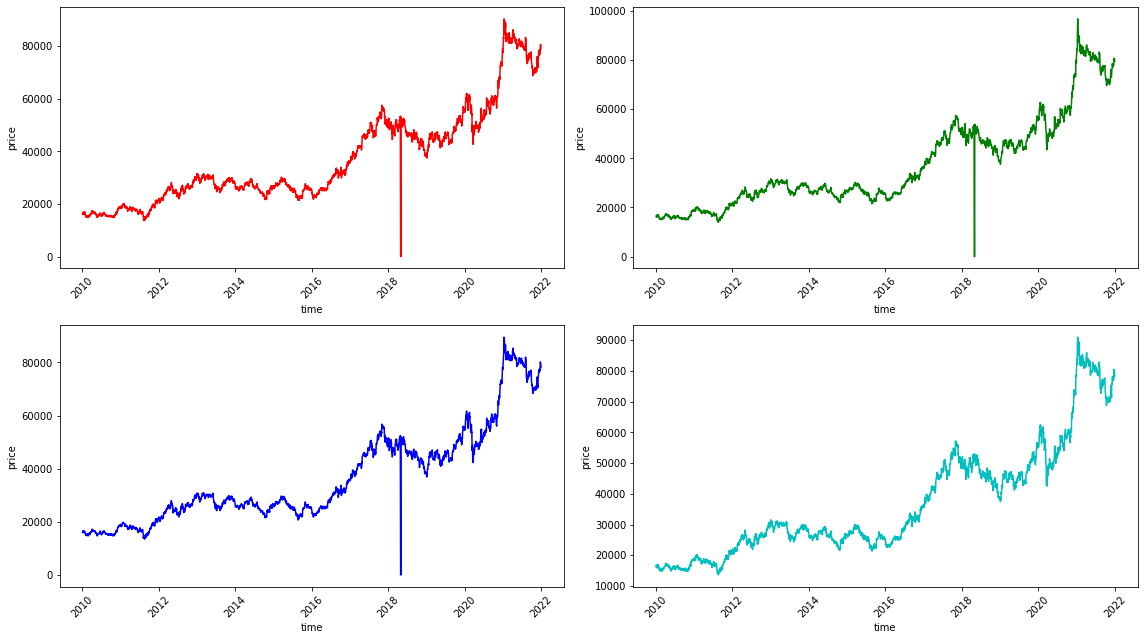

In [19]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
color = ['r', 'g', 'b', 'c']
for i, col in enumerate(dataset.columns[:-2]):
    pos = ax[i//2, i%2]
    pos.plot(dataset.index, dataset[col], c= color[i])
    pos.set_xlabel('time')
    pos.set_ylabel('price')
    pos.tick_params(axis = 'x', rotation = 45)
plt.tight_layout()
plt.show()

In [23]:
# 데이터 전처리
dataset[dataset['Open'] == 0]

# 0데이터 제거
drop_idx = dataset[dataset['Open'] == 0].index
dataset.drop(drop_idx, axis = 0, inplace = True)

In [25]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
scaled = MM.fit_transform(dataset.iloc[:, :4])
dataset_scaled = pd.DataFrame(scaled, columns = dataset.columns[:-2])
dataset_scaled.head()

,Open,High,Low,Close
0,0.031062,0.027034,0.033658,0.033333
1,0.037066,0.031861,0.037602,0.036693
2,0.037849,0.034757,0.040494,0.041602
3,0.040981,0.034757,0.037076,0.034367
4,0.035500,0.029930,0.035235,0.036434


In [30]:
# 데이터 변환
def make_windowed_dataset(dataset, start_index, end_index, time_step, target_size, step, single_step = False):
    target = dataset['Close'].values
    dataset = dataset.to_numpy()
    data = []
    labels = []
    start_index = start_index + time_step
    if end_index is None:
        end_index = dataset.shape[0] - time_step
    for i in range(start_index, end_index):
        indexs = range(i - time_step, i, step)
        data.append(dataset[indexs])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])
    return np.array(data), np.array(labels)

In [31]:
time_step = 30
train_size = int(dataset.shape[0] + 0.85)
x_train_single, y_train_single = make_windowed_dataset(dataset_scaled, 0, train_size, time_step, 0, 1, single_step = True)

x_test_single, y_test_single = make_windowed_dataset(dataset_scaled, train_size, None, time_step, 0, 1, single_step = True)


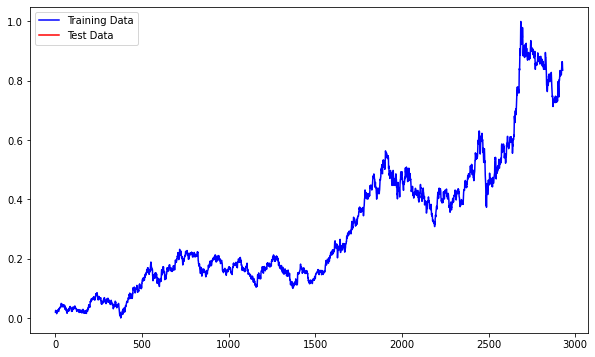

In [35]:
# 데이터 시각화
fig, ax = plt.subplots(1, figsize = (10, 6))
ax.plot(range(len(y_train_single)), y_train_single, c = 'b', label = 'Training Data')
ax.plot(range(len(y_train_single), len(y_test_single) + len(y_train_single)), y_test_single, c = 'r', label = 'Test Data')
plt.legend()
plt.show()

In [36]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
tf.random.set_seed(42)
np.random.seed(42)

In [38]:
# LSTM 모델 구축
LSTM_model = tf.keras.models.Sequential()
LSTM_model.add(tf.keras.layers.LSTM(100, activation = 'tanh', input_shape = (time_step, 4)))
LSTM_model.add(tf.keras.layers.Dense(1, activation = 'linear'))

loss = Huber()
LSTM_model.compile(optimizer = Adam(13 - 4), loss = loss, metrics = ['mse'])

In [41]:
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)

filename = os.path.join('LSTM, LSTM.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only = True,
                             save_best_only = True,
                             monitor = 'val_loss', verbose = 1)

In [42]:
epoch = 200
batch_size = 32
LSTM_model_history = LSTM_model.fit(x_train_single, y_train_single, epochs = epoch, batch_size = batch_size,
                                    validation_data = (x_test_single, y_test_single), verbose = 2,
                                    callbacks = [checkpoint, earlystopping])

Epoch 1/200
92/92 - 5s - loss: 88.6192 - mse: 12472.0928 - 5s/epoch - 56ms/step
Epoch 2/200
92/92 - 1s - loss: 70.9537 - mse: 5829.7739 - 977ms/epoch - 11ms/step
Epoch 3/200
92/92 - 1s - loss: 71.2688 - mse: 5878.9766 - 974ms/epoch - 11ms/step
Epoch 4/200
92/92 - 1s - loss: 70.7841 - mse: 5802.8472 - 979ms/epoch - 11ms/step
Epoch 5/200
92/92 - 1s - loss: 71.2037 - mse: 5868.0938 - 944ms/epoch - 10ms/step
Epoch 6/200
92/92 - 1s - loss: 70.7423 - mse: 5795.9502 - 1s/epoch - 11ms/step
Epoch 7/200
92/92 - 1s - loss: 71.1849 - mse: 5865.2686 - 1s/epoch - 14ms/step
Epoch 8/200
92/92 - 1s - loss: 70.7319 - mse: 5794.5864 - 1s/epoch - 11ms/step
Epoch 9/200
92/92 - 1s - loss: 71.1602 - mse: 5861.5977 - 1s/epoch - 11ms/step
Epoch 10/200
92/92 - 1s - loss: 70.7082 - mse: 5790.4956 - 965ms/epoch - 10ms/step
Epoch 11/200
92/92 - 1s - loss: 71.1546 - mse: 5860.4370 - 998ms/epoch - 11ms/step
Epoch 12/200
92/92 - 1s - loss: 70.7058 - mse: 5790.0225 - 988ms/epoch - 11ms/step
Epoch 13/200
92/92 - 1s - l

In [43]:
plot_learning_curves(LSTM_model_history.history["loss", LSTM_model_history.history['val_loss']])
plt.show()

NameError: ignored

ValueError: ignored

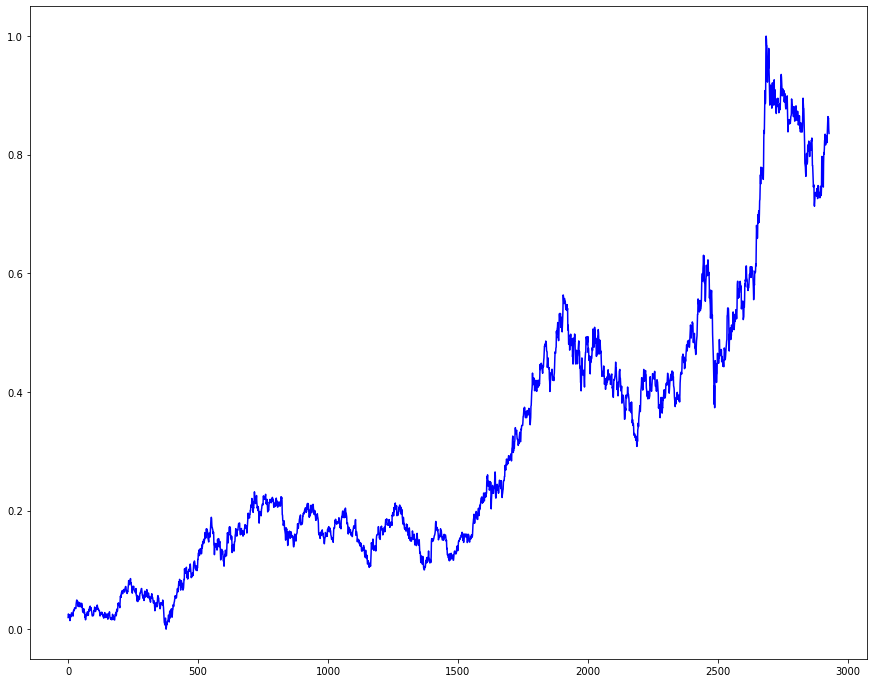

In [44]:
fig, ax = plt.subplots(1, figsize = (15, 12))
ax.plot(range(len(y_train_single)), y_train_single, c = 'b', label = 'Past')
ax.plot(range(len(y_train_single), len(y_test_single) + len(y_train_single)), y_test_single, c = 'r', label = 'True')
ax.plot(range(len(y_train_single), len(y_test_single) + len(y_train_single)), LSTM_model.predict(x_test_single), c = 'g', label = 'LSTM Data')


ax.set_title("Close data")
ax.set_xlabel("Day")
ax.set_ylabel("Closing price(scale")
plt.legend()
plt.show()